In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten,ReLU
from keras.losses import MeanSquaredLogarithmicError
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [57]:
df=pd.read_csv('/content/data.csv')
df.head()

,TV_Ads_Cost,Social_Media_ Ads_Cost,Radio_Ads_Cos t,Online_Influen cer_Partnershi ps,Discount_Perce ntage,Sales
0,45.2,30.5,20.1,3,10,180.6
1,60.1,40.2,25.5,5,5,210.3
2,30.5,25.3,15.2,2,15,160.1
3,75.0,60.0,30.0,6,8,245.5
4,20.3,10.5,8.2,1,20,120.2


In [58]:
df.isna().sum()

,0
TV_Ads_Cost,0
Social_Media_ Ads_Cost,0
Radio_Ads_Cos t,0
Online_Influen cer_Partnershi ps,0
Discount_Perce ntage,0
Sales,0


In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
df.describe()

,TV_Ads_Cost,Social_Media_ Ads_Cost,Radio_Ads_Cos t,Online_Influen cer_Partnershi ps,Discount_Perce ntage,Sales
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,46.570968,32.550000,19.103226,3.274194,12.193548,186.127581
std,17.131836,14.158977,7.063227,1.671059,4.245880,42.423225
min,19.500000,9.500000,6.500000,1.000000,5.000000,110.000000
25%,32.250000,21.375000,14.050000,2.000000,9.000000,152.750000
50%,45.850000,31.750000,19.250000,3.000000,11.500000,184.300000
75%,60.250000,42.875000,24.875000,5.000000,15.000000,223.750000
max,80.000000,62.000000,33.000000,6.000000,21.000000,260.500000


In [64]:
# divided the data into dependent and independent
X=df.drop('Sales',axis=1)
y=df['Sales']
scaler=StandardScaler()
# split the data into the train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
# Normalize the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Model Buliding
ann_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
# Compile the model with optimizer
optimizer_adam=Adam(learning_rate=0.01)
ann_model.compile(optimizer=optimizer_adam,loss='mean_squared_error',metrics=['mae',])
# fit the model with traing data
model_building = ann_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=60,
    batch_size=30,
    verbose=1
)

Epoch 1/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 900ms/step - loss: 36063.6250 - mae: 185.6616 - val_loss: 39451.6523 - val_mae: 193.8800
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 34477.6875 - mae: 181.4504 - val_loss: 37901.7109 - val_mae: 189.9402
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 33209.0703 - mae: 177.3590 - val_loss: 34808.5781 - val_mae: 181.7690
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 30807.6211 - mae: 170.3831 - val_loss: 29517.6543 - val_mae: 166.5549
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 25769.5684 - mae: 154.5321 - val_loss: 21764.8164 - val_mae: 140.2858
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 18993.1562 - mae: 128.4852 - val_loss: 12756.3506 - val_mae: 103.3089
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11767.5508 - mae: 99.2406 - val_loss: 7247.8979 - val_mae: 74.8642
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8329.2637 - mae: 79.2078 - val_loss: 9788.7393 - val_mae

In [71]:
y_pred=ann_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2_model_score=r2_score(y_test,y_pred)
print(f'Mean squared error : {mse}')
print(f'Mean absolute error : {mae}')
print(f'R2 score : {r2_model_score}')
print(f'Root mean sqaured error is: {np.sqrt(mse)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Mean squared error : 44.45019758147494
Mean absolute error : 5.191866713303787
R2 score : 0.976629334814322
Root mean sqaured error is: 6.667098137981392


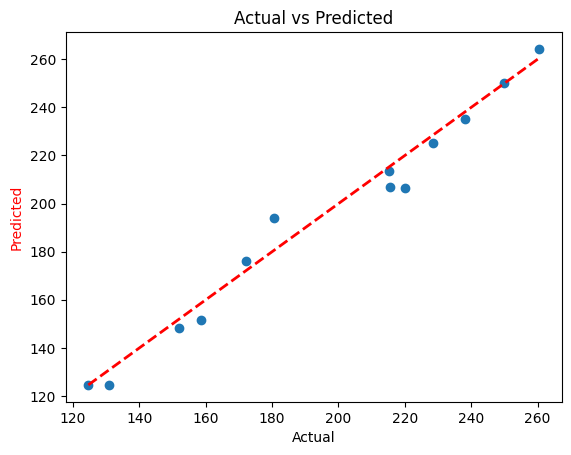

In [76]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted",color='red')
plt.title("Actual vs Predicted")
plt.show()